# Tarea Nº2 de Redes Complejas.

## Nombres: Angela Martínez / Ignacio Delgadillo.

In [ ]:
import pandas as pd
import networkx as nw
import graphviz as gr
import matplotlib.pyplot as plt
import numpy as np





### Pregunta 2.

Creamos el grafo.

In [ ]:
nodos = [1,2,3,4,5,6,7,8]
aristas = [(1,2),(1,3),(1,4),(2,3),(2,4),(2,5),(3,4),(4,8),(5,6),(5,7),(5,8),(6,7),(6,8),(7,8)]
G = nw.Graph()
G.add_nodes_from(nodos)
G.add_edges_from(aristas)
L = nw.laplacian_matrix(G)
L_S = nw.laplacian_spectrum(G)
F_V= nw.fiedler_vector(G, weight='weight', normalized=False, tol=1e-08, method='tracemin_pcg', seed=None)

Su matriz Laplaciana es:

In [ ]:
print(L)

  (0, 0)	3
  (0, 1)	-1
  (0, 2)	-1
  (0, 3)	-1
  (1, 0)	-1
  (1, 1)	4
  (1, 2)	-1
  (1, 3)	-1
  (1, 4)	-1
  (2, 0)	-1
  (2, 1)	-1
  (2, 2)	3
  (2, 3)	-1
  (3, 0)	-1
  (3, 1)	-1
  (3, 2)	-1
  (3, 3)	4
  (3, 7)	-1
  (4, 1)	-1
  (4, 4)	4
  (4, 5)	-1
  (4, 6)	-1
  (4, 7)	-1
  (5, 4)	-1
  (5, 5)	3
  (5, 6)	-1
  (5, 7)	-1
  (6, 4)	-1
  (6, 5)	-1
  (6, 6)	3
  (6, 7)	-1
  (7, 3)	-1
  (7, 4)	-1
  (7, 5)	-1
  (7, 6)	-1
  (7, 7)	4


El espectro laplaciano con el valor de Fiedler

In [ ]:
print(L_S)

[3.33066907e-16 7.63932023e-01 4.00000000e+00 4.00000000e+00
 4.00000000e+00 4.00000000e+00 5.23606798e+00 6.00000000e+00]


Y su vector de Fiedler:

In [ ]:
print(F_V)

[-0.42532541 -0.26286556 -0.4253254  -0.26286556  0.26286556  0.4253254
  0.42532541  0.26286556]


Por último, una gráfica de la red.

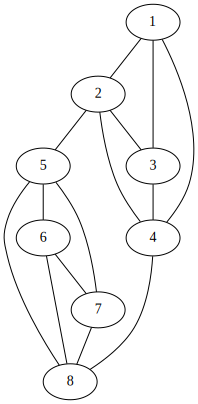

In [ ]:
A = nw.nx_agraph.to_agraph(G)
A.layout('dot')
gr.Source(A.to_string())

In [14]:

import pandas as pd
import networkx as nw
import graphviz as gr
import matplotlib.pyplot as plt
import numpy as np

Grafos=['A','B','C','D','E','F','G','H','I','J']
i=0
while i<10:
    print("Red "+Grafos[i])
    edges_random = [(np.random.randint(0, 985),np.random.randint(0,985)) for i in range(16687)]
    nodos=list(range(0,985))
    Grafos[i] = nw.Graph()
    Grafos[i].add_edges_from(edges_random)
    Grafos[i].add_nodes_from(nodos)
    lista_grado_nodos=list(Grafos[i].degree(nodos))
    
    def Sort_Tuple(tup):   
        # getting length of list of tuples
        lst = len(tup) 
        for i in range(0, lst): 
            for j in range(0, lst-i-1): 
                if (tup[j][1] > tup[j + 1][1]): 
                    temp = tup[j] 
                    tup[j]= tup[j + 1] 
                    tup[j + 1]= temp 
        return tup 
    degree_order= Sort_Tuple(lista_grado_nodos)
    second = [a_tuple[1] for a_tuple in degree_order]
    prom= sum(second)/985
    Grafos[i].remove_edges_from(nw.selfloop_edges(Grafos[i]))
    subGrafo= nw.algorithms.core.k_shell(Grafos[i], k=None, core_number=None)
    numero_de_nodos=nw.classes.function.number_of_nodes(subGrafo)
    kcore= nw.core_number(Grafos[i])
    maxkcore=max(kcore.values())
    FruchRei=nw.fruchterman_reingold_layout(Grafos[i], dim=2, k=None, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0, center=None)
    comunidades=nw.algorithms.community.modularity_max.greedy_modularity_communities(Grafos[i], weight=None)
    coef_assor=nw.algorithms.assortativity.degree_assortativity_coefficient(Grafos[i], x='out', y='in', weight=None, nodes=None)
    Q=nw.algorithms.community.quality.modularity(Grafos[i], list(comunidades), weight='weight')
    print("Coeficiente de Modularidad Q : "+str(Q))
    print("Coeficiente de Asortatividad : "+str(coef_assor))
    print("Cantidad de comunidades : "+str(len(list(comunidades))))
    print("Numero de nodos K_Shell : "+str(numero_de_nodos))
    print("K_core : "+str(maxkcore))
    print("Grado promedio de Grafo : "+str(prom))
    i=i+1




Red A
Coeficiente de Modularidad Q:0.13971024265441212
Coeficiente de Asortatividad :0.002001185940406517
Cantidad de comunidades : 4
Numero de nodos K_Shell :932
K_core :24
Grado promedio de Grafo :33.32791878172589
Red B
Coeficiente de Modularidad Q:0.1361422013160358
Coeficiente de Asortatividad :0.0023214276011445877
Cantidad de comunidades : 5
Numero de nodos K_Shell :927
K_core :24
Grado promedio de Grafo :33.303553299492386
Red C
Coeficiente de Modularidad Q:0.13869805577868255
Coeficiente de Asortatividad :-0.0019434294269876848
Cantidad de comunidades : 5
Numero de nodos K_Shell :905
K_core :24
Grado promedio de Grafo :33.31167512690355
Red D
Coeficiente de Modularidad Q:0.13811751134482136
Coeficiente de Asortatividad :-0.006973767216805807
Cantidad de comunidades : 5
Numero de nodos K_Shell :895
K_core :25
Grado promedio de Grafo :33.36040609137056
Red E
Coeficiente de Modularidad Q:0.13746708456683865
Coeficiente de Asortatividad :-0.019554587502707083
Cantidad de comunidad